In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

electricity_data = pd.read_csv("../../../Análise de Dados/Conjunto de Dados/building-data-genome-project-2/data/meters/raw/electricity.csv", index_col='timestamp', parse_dates=True)
weather_data = pd.read_csv("../../../Análise de Dados/Conjunto de Dados/building-data-genome-project-2/data/weather/weather.csv", index_col='timestamp', parse_dates=True)

In [3]:
electricity_data.head()

Panther_parking_Lorriane  Panther_lodging_Cora  \
timestamp                                                             
2016-01-01 00:00:00                       0.0                   0.0   
2016-01-01 01:00:00                       0.0                   0.0   
2016-01-01 02:00:00                       0.0                   0.0   
2016-01-01 03:00:00                       0.0                   0.0   
2016-01-01 04:00:00                       0.0                   0.0   

                     Panther_office_Hannah  Panther_lodging_Hattie  \
timestamp                                                            
2016-01-01 00:00:00                    0.0                     0.0   
2016-01-01 01:00:00                    0.0                     0.0   
2016-01-01 02:00:00                    0.0                     0.0   
2016-01-01 03:00:00                    0.0                     0.0   
2016-01-01 04:00:00                    0.0                     0.0   

                     Panther_education_Teofila  Panther_education_Jerome  \
timestamp                                                                  
2016-01-01 00:00:00                        0.0                       0.0   
2016-01-01 01:00:00                        0.0                       0.0   
2016-01-01 02:00:00                        0.0                       0.0   
2016-01-01 03:00:00                        0.0                       0.0   
2016-01-01 04:00:00                        0.0                       0.0   

                     Panther_retail_Felix  Panther_parking_Asia  \
timestamp                                                         
2016-01-01 00:00:00                   0.0                   0.0   
2016-01-01 01:00:00                   0.0                   0.0   
2016-01-01 02:00:00                   0.0                   0.0   
2016-01-01 03:00:00                   0.0                   0.0   
2016-01-01 04:00:00                   0.0                   0.0   

                     Panther_education_Misty  Panther_retail_Gilbert  ...  \
timestamp                                                             ...   
2016-01-01 00:00:00                      0.0                     0.0  ...   
2016-01-01 01:00:00                      0.0                     0.0  ...   
2016-01-01 02:00:00                      0.0                     0.0  ...   
2016-01-01 03:00:00                      0.0                     0.0  ...   
2016-01-01 04:00:00                      0.0                     0.0  ...   

                     Cockatoo_public_Caleb  Cockatoo_education_Tyler  \
timestamp                                                              
2016-01-01 00:00:00                123.200                   727.575   
2016-01-01 01:00:00                126.475                   731.200   
2016-01-01 02:00:00                127.825                   724.675   
2016-01-01 03:00:00                130.475                   737.375   
2016-01-01 04:00:00                129.675                   721.150   

                     Cockatoo_public_Shad  Mouse_health_Buddy  \
timestamp                                                       
2016-01-01 00:00:00                69.200              8.8224   
2016-01-01 01:00:00                66.275             17.6449   
2016-01-01 02:00:00                64.675             17.6449   
2016-01-01 03:00:00                65.875             17.6449   
2016-01-01 04:00:00                66.275             17.6449   

                     Mouse_health_Modesto  Mouse_lodging_Vicente  \
timestamp                                                          
2016-01-01 00:00:00              370.0870                   10.0   
2016-01-01 01:00:00              737.8260                   30.0   
2016-01-01 02:00:00              729.9255                   30.0   
2016-01-01 03:00:00              722.2620                   20.0   
2016-01-01 04:00:00              719.1665                   30.0   

                     Mouse_health_Justin  Mouse_hea

In [4]:
weather_data.head()

site_id  airTemperature  cloudCoverage  dewTemperature  \
timestamp                                                                     
2016-01-01 00:00:00  Panther            19.4            NaN            19.4   
2016-01-01 01:00:00  Panther            21.1            6.0            21.1   
2016-01-01 02:00:00  Panther            21.1            NaN            21.1   
2016-01-01 03:00:00  Panther            20.6            NaN            20.0   
2016-01-01 04:00:00  Panther            21.1            NaN            20.6   

                     precipDepth1HR  precipDepth6HR  seaLvlPressure  \
timestamp                                                             
2016-01-01 00:00:00             0.0             NaN             NaN   
2016-01-01 01:00:00            -1.0             NaN          1019.4   
2016-01-01 02:00:00             0.0             NaN          1018.8   
2016-01-01 03:00:00             0.0             NaN          1018.1   
2016-01-01 04:00:00             0.0             NaN          1019.0   

                     windDirection  windSpeed  
timestamp                                      
2016-01-01 00:00:00            0.0        0.0  
2016-01-01 01:00:00            0.0        0.0  
2016-01-01 02:00:00          210.0        1.5  
2016-01-01 03:00:00            0.0        0.0  
2016-01-01 04:00:00          290.0        1.5

# Trabalhando com os dados elétricos

Começo trabalhando com um edifício específico como exemplo, para compreender como posso fazer o tratamentos dos dados. Por serem dados de medição temporal em horas, devo limpar os dados e reajustá-los para outra escala, em dias ou em meses.

In [5]:
edificio_01 = electricity_data.iloc[:,[0]]
edificio_01

Panther_parking_Lorriane
timestamp                                    
2016-01-01 00:00:00                    0.0000
2016-01-01 01:00:00                    0.0000
2016-01-01 02:00:00                    0.0000
2016-01-01 03:00:00                    0.0000
2016-01-01 04:00:00                    0.0000
...                                       ...
2017-12-31 19:00:00                   15.4830
2017-12-31 20:00:00                   12.7224
2017-12-31 21:00:00                   11.2822
2017-12-31 22:00:00                   16.9233
2017-12-31 23:00:00                   11.8223

[17544 rows x 1 columns]

In [6]:
edificio_01.index[5].month

1

In [7]:
edificio_01.index[5].hour

5

In [8]:
edificio_01.index[5].year

2016

<AxesSubplot:xlabel='timestamp'>

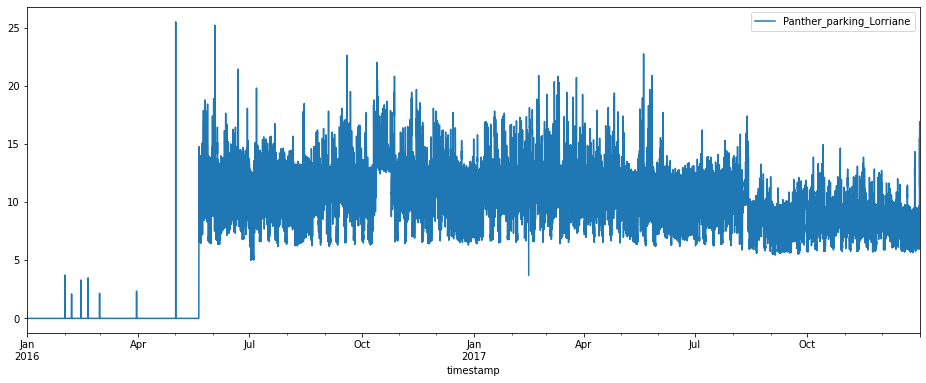

In [9]:
edificio_01.plot(figsize=(16,6))

<AxesSubplot:xlabel='timestamp'>

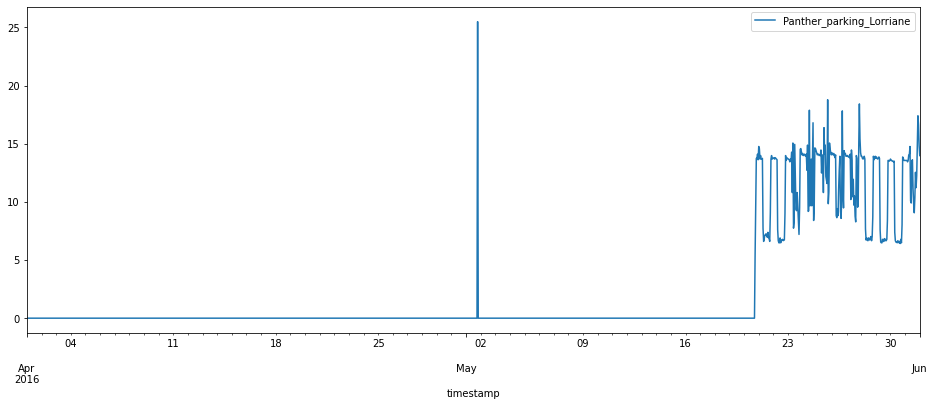

In [10]:
edificio_01_inicio = edificio_01.truncate(before = "2016-04-01", after="2016-06-01")
edificio_01_inicio.plot(figsize=(16, 6))

<AxesSubplot:xlabel='timestamp'>

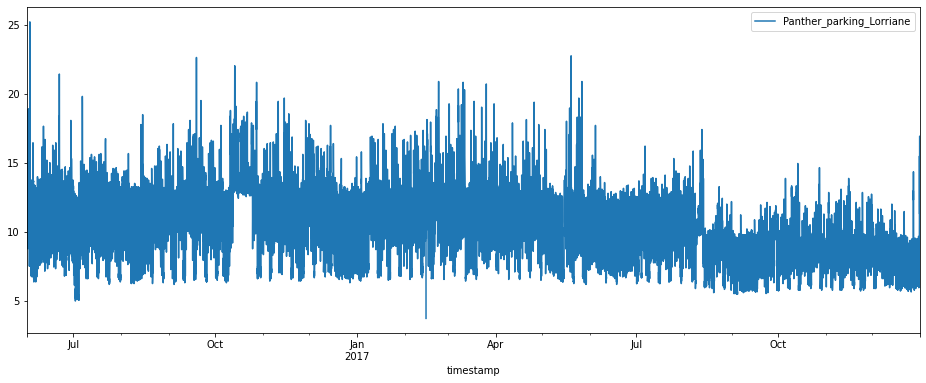

In [11]:
edificio_01= edificio_01.truncate(before="2016-06-01")
edificio_01.plot(figsize=(16,6))

<AxesSubplot:xlabel='timestamp'>

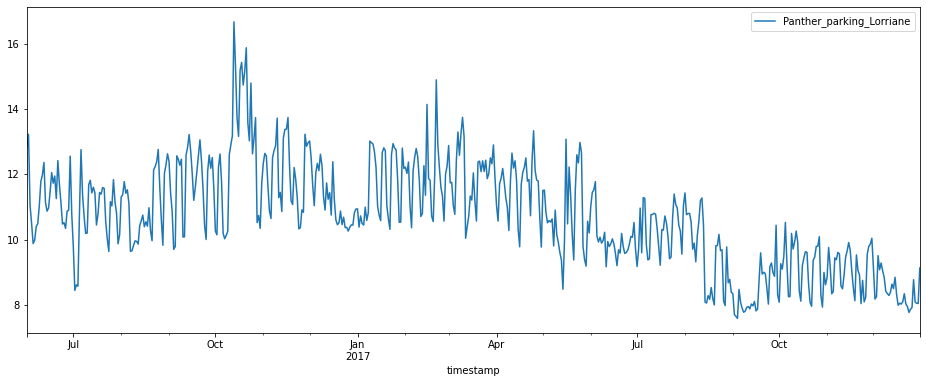

In [12]:
edificio_01_diario = edificio_01.resample("D").mean()
edificio_01_diario.plot(figsize=(16,6))

<AxesSubplot:xlabel='timestamp'>

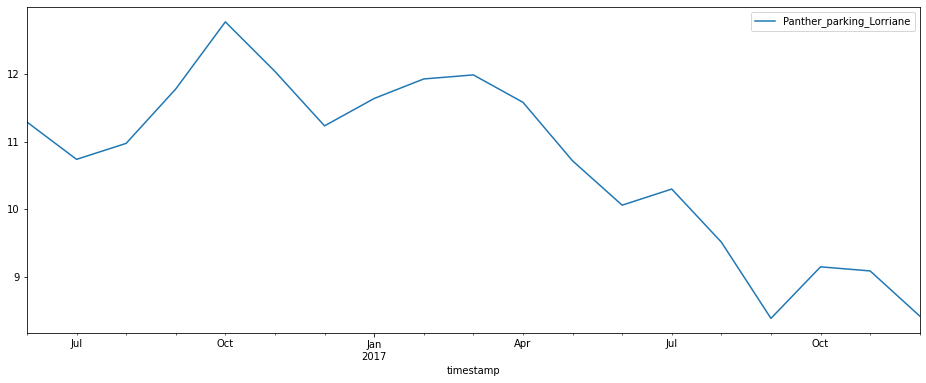

In [13]:
edificio_01_mensal = edificio_01.resample("M").mean()
edificio_01_mensal.plot(figsize=(16,6))

In [14]:
edificio_01_media_movel = edificio_01_diario.rolling(7, center=True).mean()
edificio_01_media_movel.head(15)

Panther_parking_Lorriane
timestamp                           
2016-06-01                       NaN
2016-06-02                       NaN
2016-06-03                       NaN
2016-06-04                 11.124285
2016-06-05                 10.787078
2016-06-06                 10.474875
2016-06-07                 10.578824
2016-06-08                 10.790295
2016-06-09                 11.145364
2016-06-10                 11.310394
2016-06-11                 11.377907
2016-06-12                 11.447204
2016-06-13                 11.508286
2016-06-14                 11.547224
2016-06-15                 11.511145

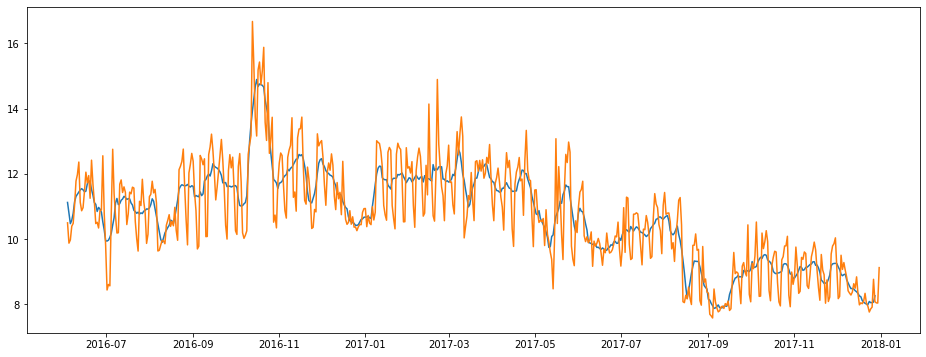

In [15]:
start, end = '2016-06-04', '2017-12-31'
fig, ax = plt.subplots(figsize=(16, 6))
#edificio_01_media_movel[start]
ax.plot(edificio_01_media_movel.loc[start:end, "Panther_parking_Lorriane"])
ax.plot(edificio_01_diario.loc[start:end, "Panther_parking_Lorriane"])

Agora vou repetir esse processo mas trabalhando com um grande número de edifícios. Inicialmente trabalharei com 20, para depois testar se posso fazer mais.
Para efeito de comparação, vou selecionar edifícios de um mesmo grupo de uso. De acordo com a análise dos metadados, o grupo educacional é o que tem uma maior quantidade de edifícios. Posso selecionar esse grupo pelo nome nos dados elétricos.

In [16]:
electricity_data.iloc[:,1].name
edu_buildings = [column for column in electricity_data.columns if 'office' in electricity_data[column].name]
edu_elec_data = electricity_data.loc[:,edu_buildings]
edu_elec_data

Panther_office_Hannah  Panther_office_Catherine  \
timestamp                                                              
2016-01-01 00:00:00                 0.0000                    0.0000   
2016-01-01 01:00:00                 0.0000                    0.0000   
2016-01-01 02:00:00                 0.0000                    0.0000   
2016-01-01 03:00:00                 0.0000                    0.0000   
2016-01-01 04:00:00                 0.0000                    0.0000   
...                                    ...                       ...   
2017-12-31 19:00:00                 3.4357                   71.0937   
2017-12-31 20:00:00                 3.4087                   74.0543   
2017-12-31 21:00:00                 3.3546                   64.2524   
2017-12-31 22:00:00                 3.2876                   58.7713   
2017-12-31 23:00:00                 3.3686                   28.6855   

                     Panther_office_Patti  Panther_office_Lauretta  \
timestamp                                                            
2016-01-01 00:00:00                0.0000                   0.0000   
2016-01-01 01:00:00                0.0000                   0.0000   
2016-01-01 02:00:00                0.0000                   0.0000   
2016-01-01 03:00:00                0.0000                   0.0000   
2016-01-01 04:00:00                0.0000                   0.0000   
...                                   ...                      ...   
2017-12-31 19:00:00              404.0780                 154.3498   
2017-12-31 20:00:00              410.4792                 151.7093   
2017-12-31 21:00:00              418.4808                 152.1894   
2017-12-31 22:00:00              405.6783                 150.5090   
2017-12-31 23:00:00              358.4692                 151.2292   

                     Panther_office_Valarie  Panther_office_Karla  \
timestamp                                                           
2016-01-01 00:00:00                  0.0000                0.0000   
2016-01-01 01:00:00                  0.0000                0.0000   
2016-01-01 02:00:00                  0.0000                0.0000   
2016-01-01 03:00:00                  0.0000                0.0000   
2016-01-01 04:00:00                  0.0000                0.0000   
...                                     ...                   ...   
2017-12-31 19:00:00                 57.0510               16.0831   
2017-12-31 20:00:00                 56.5309               15.9631   
2017-12-31 21:00:00                 53.6904               15.9631   
2017-12-31 22:00:00                 51.4099               16.2031   
2017-12-31 23:00:00                 57.5711               16.0831   

                     Panther_office_Graham  Panther_office_Larry  \
timestamp                                                          
2016-01-01 00:00:00                 0.0000                0.0000   
2016-01-01 01:00:00                 0.0000                0.0000   
2016-01-01 02:00:00                 0.0000                0.0000   
2016-01-01 03:00:00                 0.0000                0.0000   
2016-01-01 04:00:00                 0.0000                0.0000   
...                                    ...                   ...   
2017-12-31 19:00:00                47.7092               24.8048   
2017-12-31 20:00:00                48.1093               24.8048   
2017-12-31 21:00:00                48.8094               24.3247   
2017-12-31 22:00:00                47.9093               24.1647   
2017-12-31 23:00:00                48.5094               24.6448   

                     Panther_office_Ruthie  Panther_office_Garth  ...  \
timestamp                                                         ...   
2016-01-01 00:00:00                 0.0000                0.0000  ...   
2016-01-01 01:00:00                 0.0000                0.0000  ...   
2016-01-01 02:00:00                 0.0000                0.0000  ...   
2016-01-01 03:00:00      

Agora vou selecionar apenas os 20 primeiros

In [17]:
edu_small_group = edu_elec_data.iloc[:,:20]
edu_small_group

Panther_office_Hannah  Panther_office_Catherine  \
timestamp                                                              
2016-01-01 00:00:00                 0.0000                    0.0000   
2016-01-01 01:00:00                 0.0000                    0.0000   
2016-01-01 02:00:00                 0.0000                    0.0000   
2016-01-01 03:00:00                 0.0000                    0.0000   
2016-01-01 04:00:00                 0.0000                    0.0000   
...                                    ...                       ...   
2017-12-31 19:00:00                 3.4357                   71.0937   
2017-12-31 20:00:00                 3.4087                   74.0543   
2017-12-31 21:00:00                 3.3546                   64.2524   
2017-12-31 22:00:00                 3.2876                   58.7713   
2017-12-31 23:00:00                 3.3686                   28.6855   

                     Panther_office_Patti  Panther_office_Lauretta  \
timestamp                                                            
2016-01-01 00:00:00                0.0000                   0.0000   
2016-01-01 01:00:00                0.0000                   0.0000   
2016-01-01 02:00:00                0.0000                   0.0000   
2016-01-01 03:00:00                0.0000                   0.0000   
2016-01-01 04:00:00                0.0000                   0.0000   
...                                   ...                      ...   
2017-12-31 19:00:00              404.0780                 154.3498   
2017-12-31 20:00:00              410.4792                 151.7093   
2017-12-31 21:00:00              418.4808                 152.1894   
2017-12-31 22:00:00              405.6783                 150.5090   
2017-12-31 23:00:00              358.4692                 151.2292   

                     Panther_office_Valarie  Panther_office_Karla  \
timestamp                                                           
2016-01-01 00:00:00                  0.0000                0.0000   
2016-01-01 01:00:00                  0.0000                0.0000   
2016-01-01 02:00:00                  0.0000                0.0000   
2016-01-01 03:00:00                  0.0000                0.0000   
2016-01-01 04:00:00                  0.0000                0.0000   
...                                     ...                   ...   
2017-12-31 19:00:00                 57.0510               16.0831   
2017-12-31 20:00:00                 56.5309               15.9631   
2017-12-31 21:00:00                 53.6904               15.9631   
2017-12-31 22:00:00                 51.4099               16.2031   
2017-12-31 23:00:00                 57.5711               16.0831   

                     Panther_office_Graham  Panther_office_Larry  \
timestamp                                                          
2016-01-01 00:00:00                 0.0000                0.0000   
2016-01-01 01:00:00                 0.0000                0.0000   
2016-01-01 02:00:00                 0.0000                0.0000   
2016-01-01 03:00:00                 0.0000                0.0000   
2016-01-01 04:00:00                 0.0000                0.0000   
...                                    ...                   ...   
2017-12-31 19:00:00                47.7092               24.8048   
2017-12-31 20:00:00                48.1093               24.8048   
2017-12-31 21:00:00                48.8094               24.3247   
2017-12-31 22:00:00                47.9093               24.1647   
2017-12-31 23:00:00                48.5094               24.6448   

                     Panther_office_Ruthie  Panther_office_Garth  \
timestamp                                                          
2016-01-01 00:00:00                 0.0000                0.0000   
2016-01-01 01:00:00                 0.0000                0.0000   
2016-01-01 02:00:00                 0.0000                0.0000   
2016-01-01 03:00:00                 0.0000        

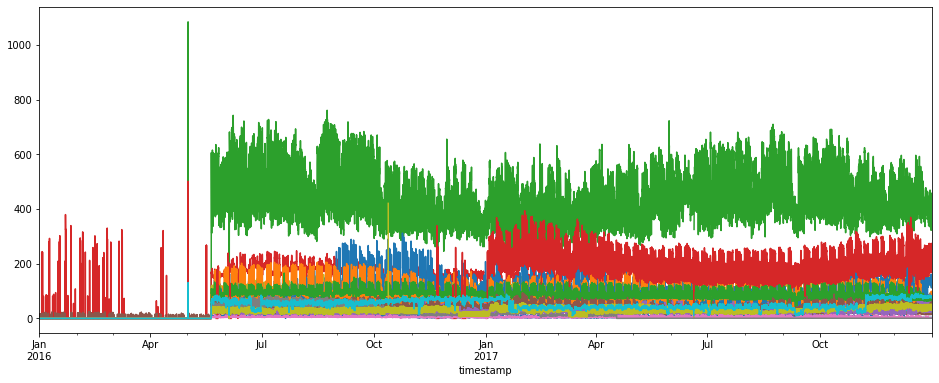

In [18]:
for col in edu_small_group.columns:
    edu_small_group[col].plot(figsize=(16,6))

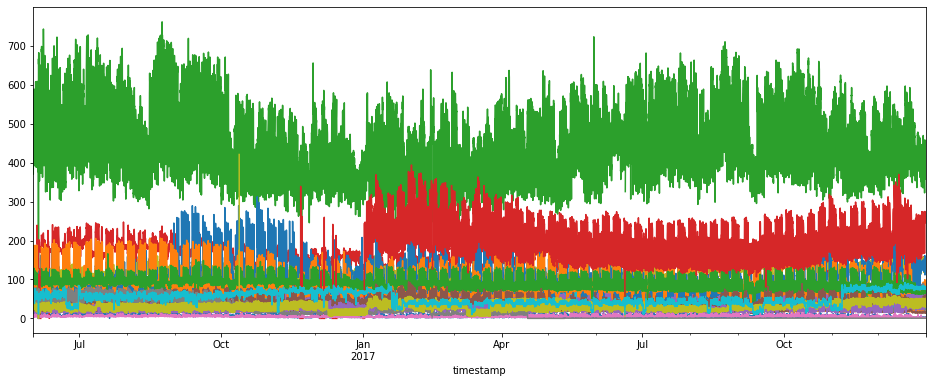

In [19]:
edu_small_group= edu_small_group.truncate(before="2016-06-01")
for col in edu_small_group.columns:
    edu_small_group[col].plot(figsize=(16,6))

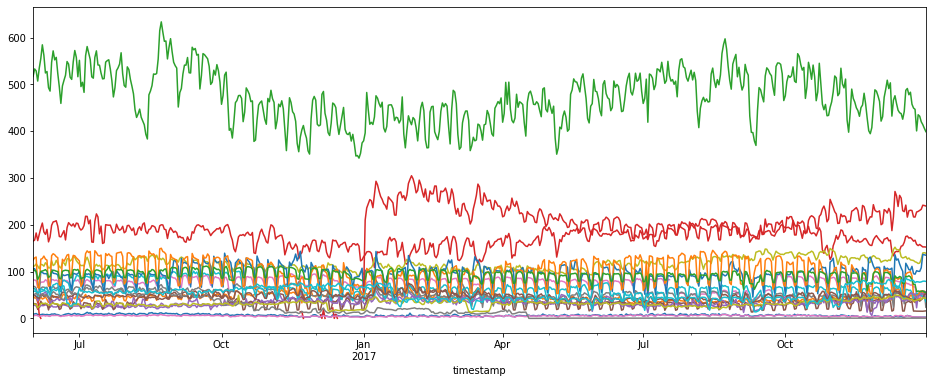

In [20]:
edu_small_group_diario = edu_small_group.resample("D").mean()
for col in edu_small_group_diario.columns:
    edu_small_group_diario[col].plot(figsize=(16,6))

array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>],
      dtype=object)

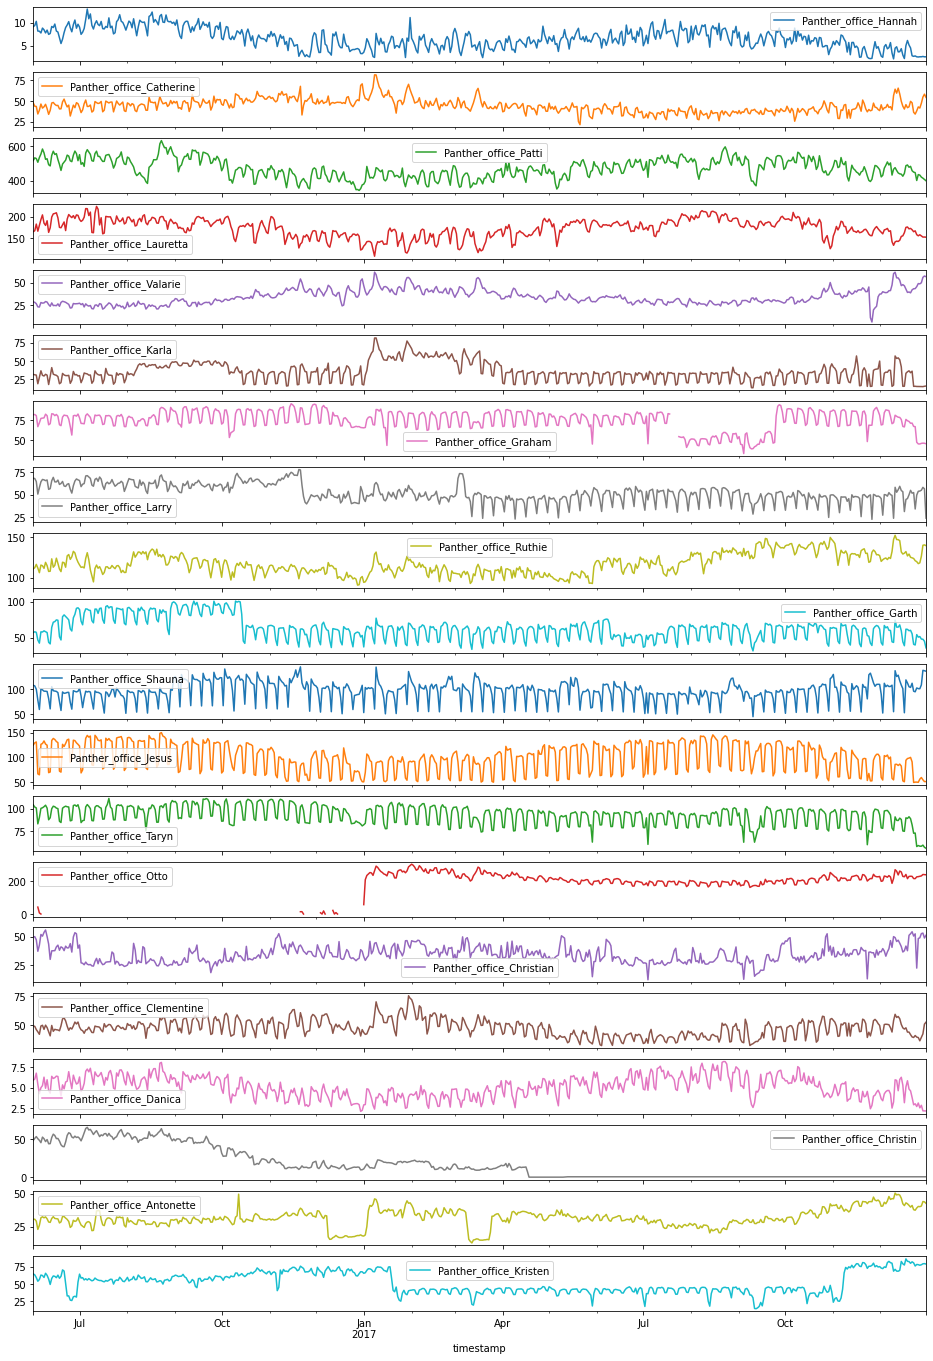

In [21]:
edu_small_group_diario.plot(figsize=(16,24), subplots=True)

Agora posso fazer esse processo com todos os dados. Para testar eu crio gráficos dos 20 primeiros edifícios usando a função iloc[:,:20]. Esses gráficos devem ser iguais aos que criei anteriormente.


In [22]:
edu_elec_data = edu_elec_data.truncate(before='2016-06-01')
edu_elec_data_diario = edu_elec_data.resample("D").mean()


array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>],
      dtype=object)

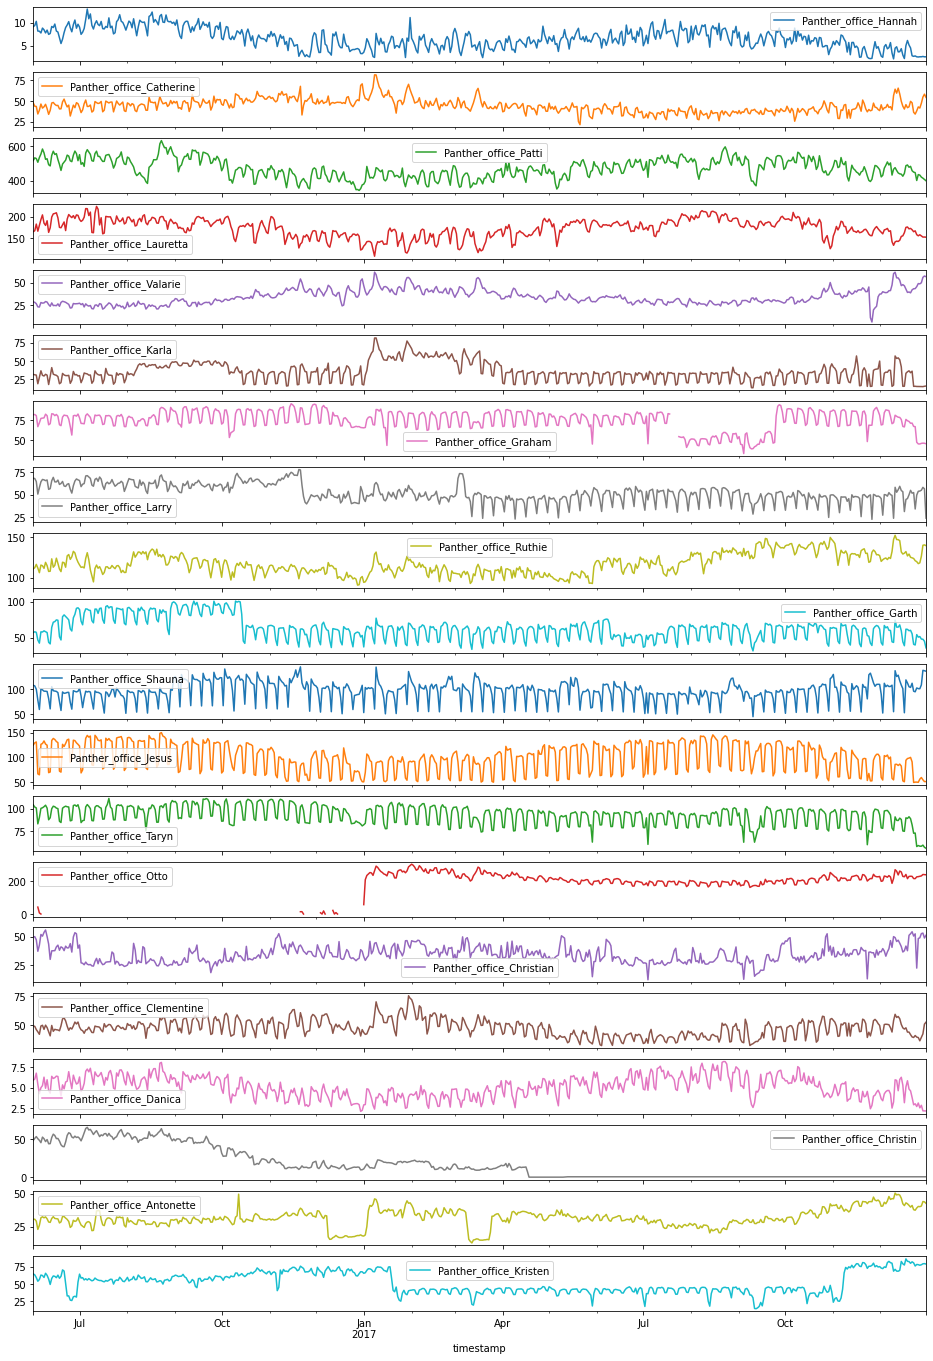

In [23]:
edu_elec_data_diario.iloc[:,:20].plot(figsize=(16, 24), subplots=True)

# Trabalhando com os dados climáticos

Inicialmente vou trabalhar apenas com dados de temperatura do ar. Por isso vou considerar apenas as colunas 'airTemperatura' e 'site_id' para que eu pegue os dados de temperatura separados por localidade.

In [85]:
temp_data = weather_data.iloc[:, :2]
temp_data

site_id  airTemperature
timestamp                                   
2016-01-01 00:00:00  Panther            19.4
2016-01-01 01:00:00  Panther            21.1
2016-01-01 02:00:00  Panther            21.1
2016-01-01 03:00:00  Panther            20.6
2016-01-01 04:00:00  Panther            21.1
...                      ...             ...
2017-12-31 19:00:00    Mouse             8.5
2017-12-31 20:00:00    Mouse             8.5
2017-12-31 21:00:00    Mouse             8.2
2017-12-31 22:00:00    Mouse             7.5
2017-12-31 23:00:00    Mouse             7.2

[331166 rows x 2 columns]

In [86]:
temp_data[temperature_data['site_id']=='Panther']

site_id  airTemperature
timestamp                                   
2016-01-01 00:00:00  Panther            19.4
2016-01-01 01:00:00  Panther            21.1
2016-01-01 02:00:00  Panther            21.1
2016-01-01 03:00:00  Panther            20.6
2016-01-01 04:00:00  Panther            21.1
...                      ...             ...
2017-12-31 19:00:00  Panther            16.1
2017-12-31 20:00:00  Panther            16.1
2017-12-31 21:00:00  Panther            15.0
2017-12-31 22:00:00  Panther            14.4
2017-12-31 23:00:00  Panther            13.9

[17544 rows x 2 columns]

Aqui faço o processo básico de preencher os dados vazios. Esses dados foram analisados em outro notebook e foi possível ver que não habia valores discrepantes.

In [87]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 331166 entries, 2016-01-01 00:00:00 to 2017-12-31 23:00:00
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   site_id         331166 non-null  object 
 1   airTemperature  331038 non-null  float64
dtypes: float64(1), object(1)
memory usage: 15.6+ MB


In [88]:
temp_data_nogaps = temp_data.fillna(method='ffill')
temp_data_nogaps.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 331166 entries, 2016-01-01 00:00:00 to 2017-12-31 23:00:00
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   site_id         331166 non-null  object 
 1   airTemperature  331166 non-null  float64
dtypes: float64(1), object(1)
memory usage: 15.6+ MB


In [95]:
temp_data_pivot = temp_data_nogaps.pivot(columns='site_id', values='airTemperature')
temp_data_pivot

site_id              Bear  Bobcat  Bull  Cockatoo  Crow  Eagle   Fox  Gator  \
timestamp                                                                     
2016-01-01 00:00:00   4.4   -14.4   9.4       NaN  -2.2    4.4   7.2   19.4   
2016-01-01 01:00:00   4.4   -13.3   8.9       NaN  -2.3    4.4   7.2   21.1   
2016-01-01 02:00:00   4.4   -15.0   8.9       NaN  -2.8    3.9   6.1   21.1   
2016-01-01 03:00:00   4.4   -12.8   8.3       NaN  -3.0    3.9   5.0   20.6   
2016-01-01 04:00:00   5.0   -14.4   7.8       NaN  -3.3    3.3   4.4   21.1   
...                   ...     ...   ...       ...   ...    ...   ...    ...   
2017-12-31 19:00:00  11.1    -2.2  -1.1       NaN -21.5    NaN  16.1   16.1   
2017-12-31 20:00:00  11.1    -3.9  -1.1     -16.7 -21.2  -12.2  13.3   16.1   
2017-12-31 21:00:00   9.4    -3.9  -1.7     -16.1 -22.3  -12.8  13.3   15.0   
2017-12-31 22:00:00   9.4    -4.4  -2.2     -15.6 -22.9  -12.8  12.2   14.4   
2017-12-31 23:00:00   8.9    -4.4  -2.2     -15.0 -23.1  -12.8  11.1   13.9   

site_id               Hog  Lamb  Moose  Mouse  Panther  Peacock  Rat  Robin  \
timestamp                                                                     
2016-01-01 00:00:00  -7.2   NaN   -2.2    3.8     19.4      7.2  7.2    3.8   
2016-01-01 01:00:00  -6.7   5.0   -2.3    3.7     21.1      6.7  6.7    3.7   
2016-01-01 02:00:00  -6.7   3.0   -2.8    2.6     21.1      6.1  5.6    2.6   
2016-01-01 03:00:00  -6.7   4.0   -3.0    2.0     20.6      5.6  5.6    2.0   
2016-01-01 04:00:00  -8.3   4.0   -3.3    2.3     21.1      5.6  5.6    2.3   
...                   ...   ...    ...    ...      ...      ...  ...    ...   
2017-12-31 19:00:00 -23.3   7.0  -21.5    8.5     16.1      NaN -7.2    8.5   
2017-12-31 20:00:00 -23.3   7.0  -21.2    8.5     16.1     -6.7 -7.2    8.5   
2017-12-31 21:00:00 -23.9   7.0  -22.3    8.2     15.0     -7.8 -7.8    8.2   
2017-12-31 22:00:00 -23.9   7.0  -22.9    7.5     14.4     -8.9 -8.3    7.5   
2017-12-31 23:00:00 -23.9   7.0  -23.1    7.2     13.9     -8.9 -8.3    7.2   

site_id              Shrew  Swan  Wolf  
timestamp                               
2016-01-01 00:00:00    3.8   3.3   1.9  
2016-01-01 01:00:00    3.7   3.9   1.6  
2016-01-01 02:00:00    2.6   4.4   0.7  
2016-01-01 03:00:00    2.0   3.3   0.8  
2016-01-01 04:00:00    2.3   4.4   2.9  
...                    ...   ...   ...  
2017-12-31 19:00:00    8.5  11.1   4.4  
2017-12-31 20:00:00    8.5  10.6   4.0  
2017-12-31 21:00:00    8.2   9.4   4.4  
2017-12-31 22:00:00    7.5   9.4   4.2  
2017-12-31 23:00:00    7.2   8.9   3.8  

[17544 rows x 19 columns]

array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>], dtype=object)

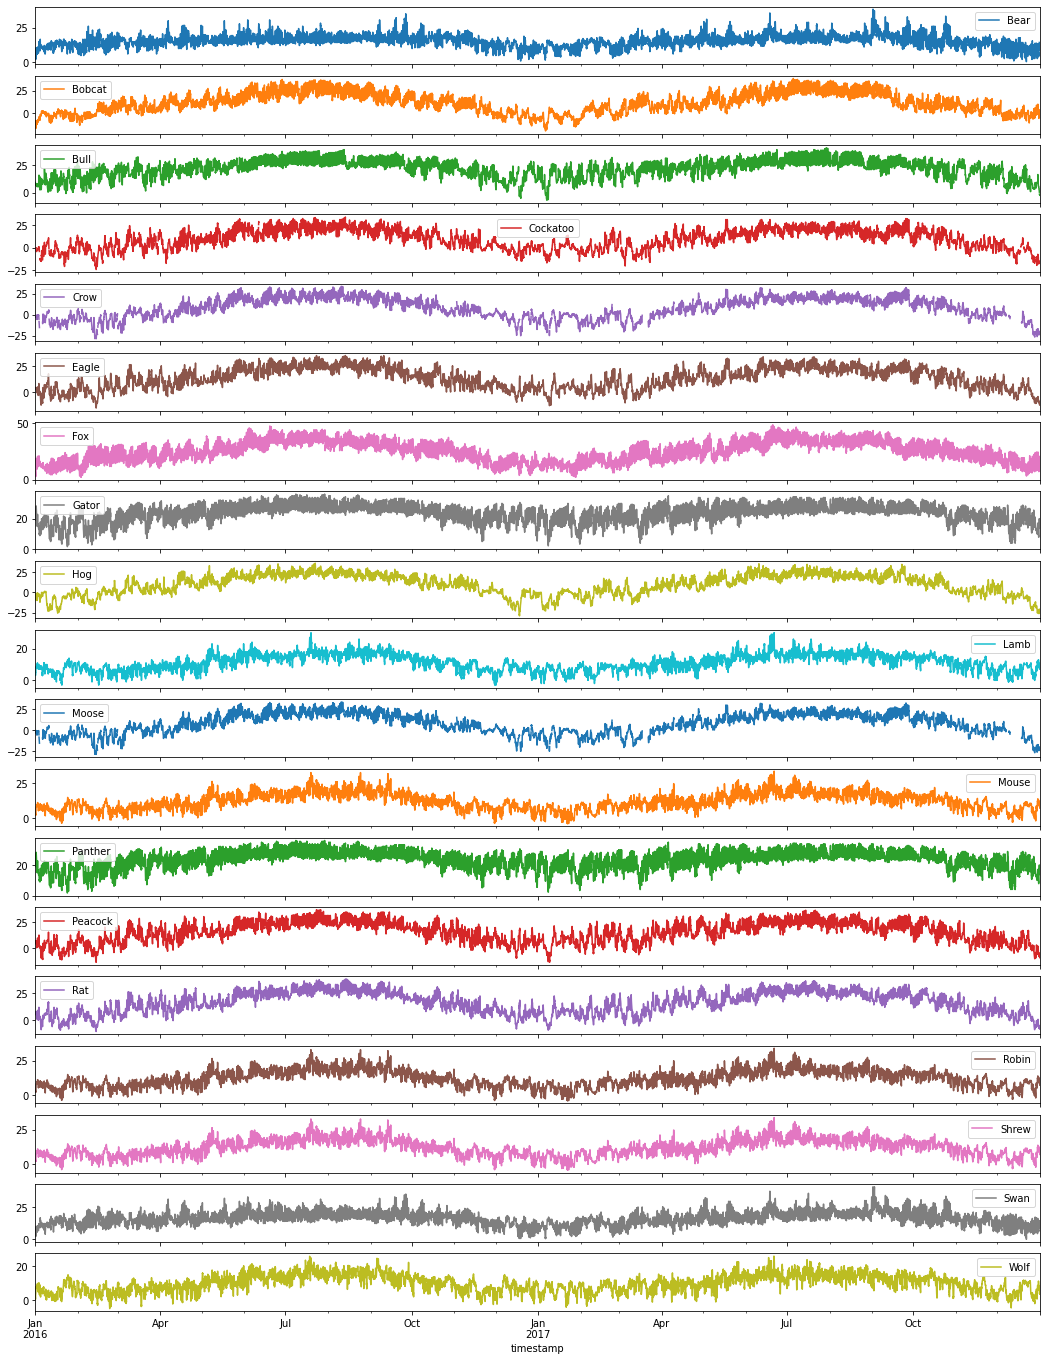

In [99]:
temp_data_pivot.plot(figsize=(18,24), subplots=True)

Os dados climáticos devem ter o mesmo padrão dos dados de eletricidade para que possam ser combinados depois.
Portanto, faço a transformação para média diária.
Devo igualar também o período dos dados. Os dados elétricos estão de Junho de 2016 até o fim de 2017. Deve fazer o mesmo com os dados climáticos

array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>], dtype=object)

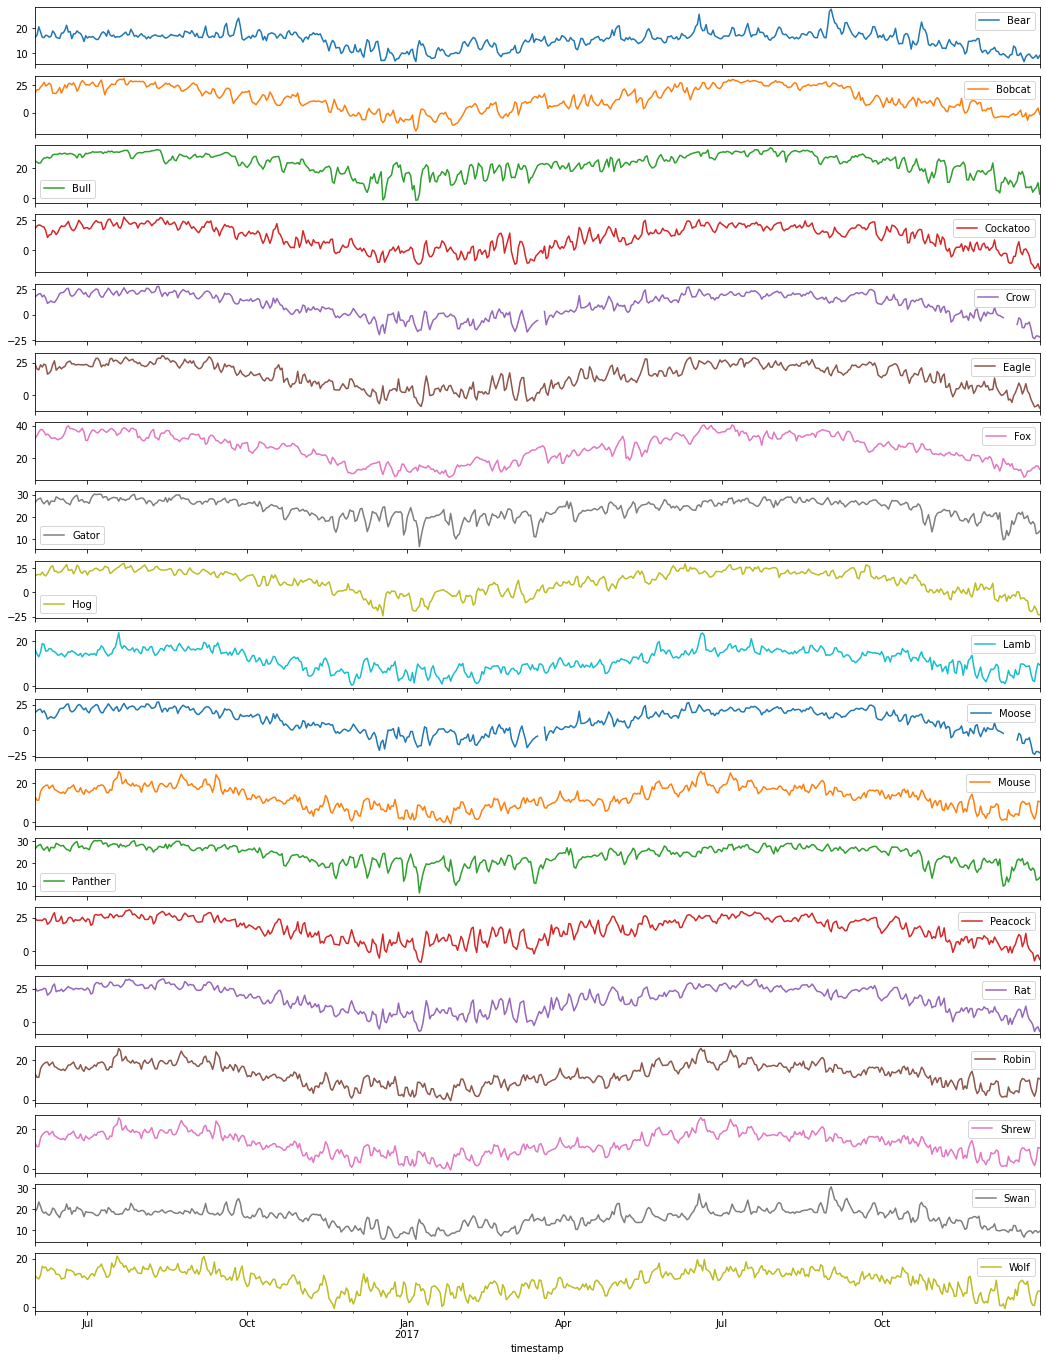

In [102]:
#temperature_data = weather_data_nogaps.loc[:, 'airTemperature']
#temperature_data.sort_index(inplace=True) # This ensures that the index is sorted so the truncate function can be used
#temperature_data = temperature_data.truncate(before='2016-06-01')
#temperatura_data_diario = temperature_data.resample("D").mean()
#temperatura_data_diario.plot(figsize=(18, 10))

temp_data_trunc = temp_data_pivot.truncate(before='2016-06-01')
temp_data_diario = temp_data_trunc.resample("D").mean()
temp_data_diario.plot(figsize=(18,24), subplots=True)

### Lembrete: tenho que checar os dados vazios no 'moose' e no 'crow'. Tentar entender porque o 'fillna' não funcionaou como eu esperava.

# Juntando os dados

In [121]:
all_data = pd.concat([edu_elec_data_diario, temp_data_diario], axis=1)
all_data

Panther_office_Hannah  Panther_office_Catherine  \
timestamp                                                     
2016-06-01               9.161767                 47.769221   
2016-06-02               9.414929                 43.650096   
2016-06-03              10.330779                 43.366704   
2016-06-04               8.199458                 34.194933   
2016-06-05               8.174238                 38.812483   
...                           ...                       ...   
2017-12-27               2.582621                 41.419658   
2017-12-28               2.579425                 47.237450   
2017-12-29               2.649679                 54.792237   
2017-12-30               2.573304                 58.322921   
2017-12-31               2.572217                 54.427171   

            Panther_office_Patti  Panther_office_Lauretta  \
timestamp                                                   
2016-06-01            517.099796               165.311913   
2016-06-02            533.136217               167.232263   
2016-06-03            528.935408               182.585233   
2016-06-04            507.231213               166.192067   
2016-06-05            534.903225               179.264592   
...                          ...                      ...   
2017-12-27            432.116721               158.000479   
2017-12-28            420.247771               155.490004   
2017-12-29            414.246617               152.729462   
2017-12-30            406.345071               152.809483   
2017-12-31            399.143687               152.469417   

            Panther_office_Valarie  Panther_office_Karla  \
timestamp                                                  
2016-06-01               28.477154             31.846150   
2016-06-02               27.978729             31.396058   
2016-06-03               26.456779             30.915963   
2016-06-04               22.897746             19.153704   
2016-06-05               22.727721             27.945408   
...                            ...                   ...   
2017-12-27               48.691071             15.417975   
2017-12-28               49.942963             15.312950   
2017-12-29               56.012471             15.222938   
2017-12-30               57.489425             15.718025   
2017-12-31               56.767617             16.038096   

            Panther_office_Graham  Panther_office_Larry  \
timestamp                                                 
2016-06-01              81.853288             68.306504   
2016-06-02              82.061675             68.086467   
2016-06-03              80.686404             64.679146   
2016-06-04              66.983762             50.616437   
2016-06-05              71.805529             57.897838   
...                           ...                   ...   
2017-12-27              45.567138             54.050433   
2017-12-28              46.329783             54.957279   
2017-12-29              46.579829             58.164546   
2017-12-30              46.450637             56.550908   
2017-12-31              45.854692             23.691250   

            Panther_office_Ruthie  Panther_office_Garth  ...       Lamb  \
timestamp                                                ...              
2016-06-01             110.833879             57.169367  ...  16.208333   
2016-06-02             112.309175             58.269583  ...  14.291667   
2016-06-03             116.397458             57.519438  ...  13.166667   
2016-06-04             111.917433             46.845704  ...  15.208333   
2016-06-05             106.191317             42.443196  ...  19.041667   
...                           ...                   ...  ...        ...   
2017-12-27             118.297829             51.609967  ...   2.666667   
2017-12-28             126.332708             48.132625  ...   2.166667   
2017-12-29             139.847821             47.887583  ...   6.916667   
2017-12-30             1

In [61]:
def heat_cooling(x):
    if x < 14:
        return 'Heating'
    else:
        return 'Cooling'

array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>],
      dtype=object)

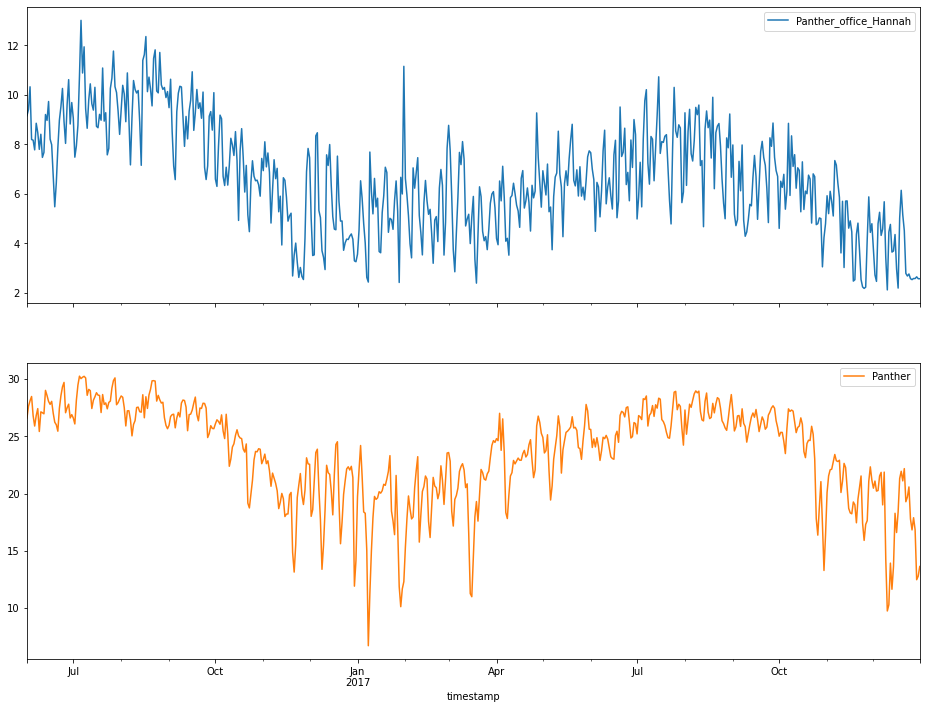

In [105]:
comparison = all_data.loc[:, ['Panther_office_Hannah', 'Panther']]
comparison.plot(figsize=(16, 12), subplots=True)

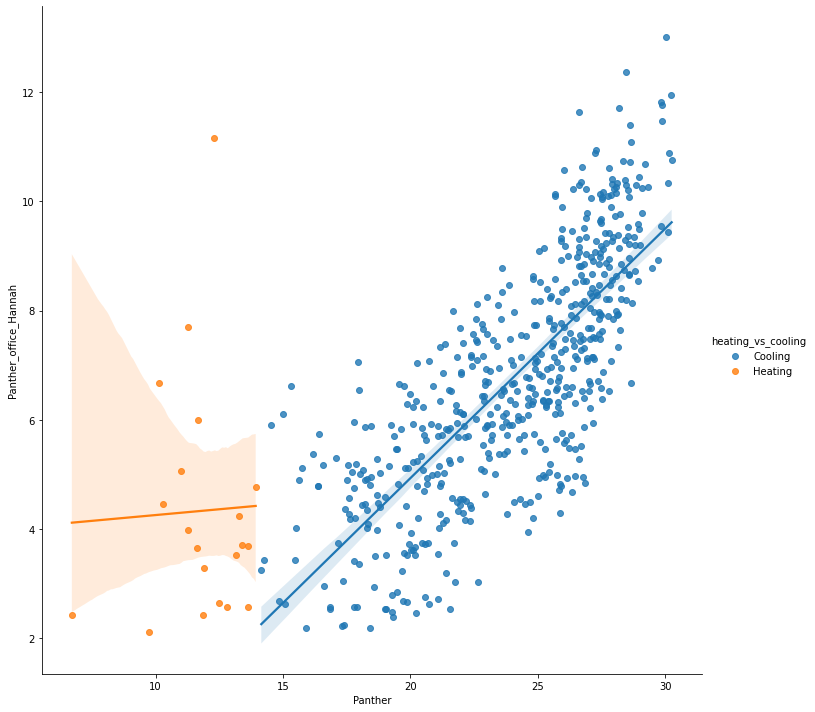

In [106]:
comparison['heating_vs_cooling'] = comparison.Panther.apply(lambda x: heat_cooling(x))
comparison
#comparison.plot(x='airTemperature', y='Panther_office_Hannah', hue='heating_vs_cooling', kind='scatter', figsize=(16,16))
sns.lmplot(data=comparison, x='Panther', y='Panther_office_Hannah', hue='heating_vs_cooling', height=10)

array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>],
      dtype=object)

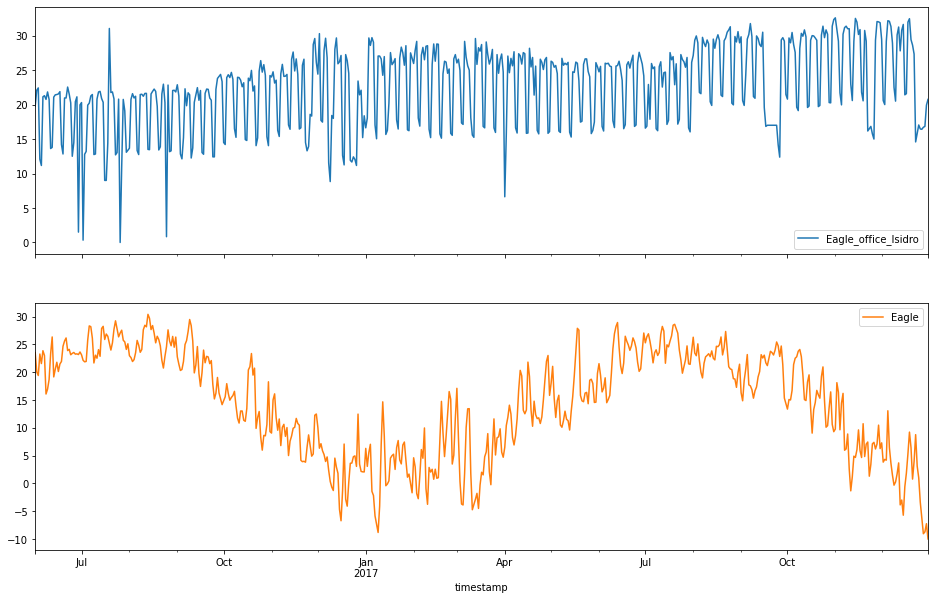

In [116]:
comparison2 = all_data.loc[:, ['Eagle_office_Isidro','Eagle']]
comparison2.plot(figsize=(16,10), subplots=True)

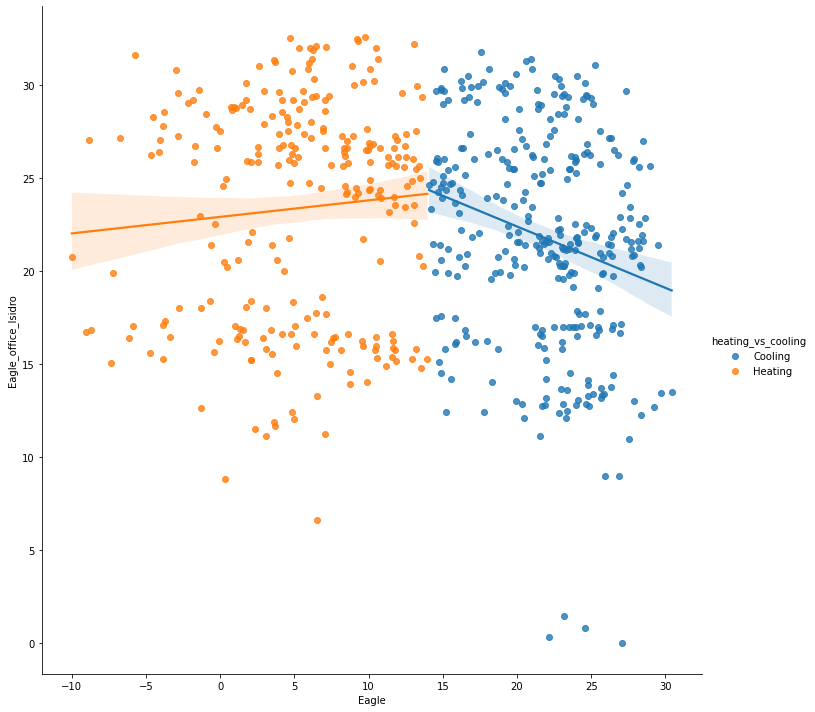

In [118]:
comparison2['heating_vs_cooling'] = comparison2.Eagle.apply(lambda x: heat_cooling(x))
sns.lmplot(data=comparison2 ,x='Eagle', y='Eagle_office_Isidro', hue='heating_vs_cooling', height=10)

array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>],
      dtype=object)

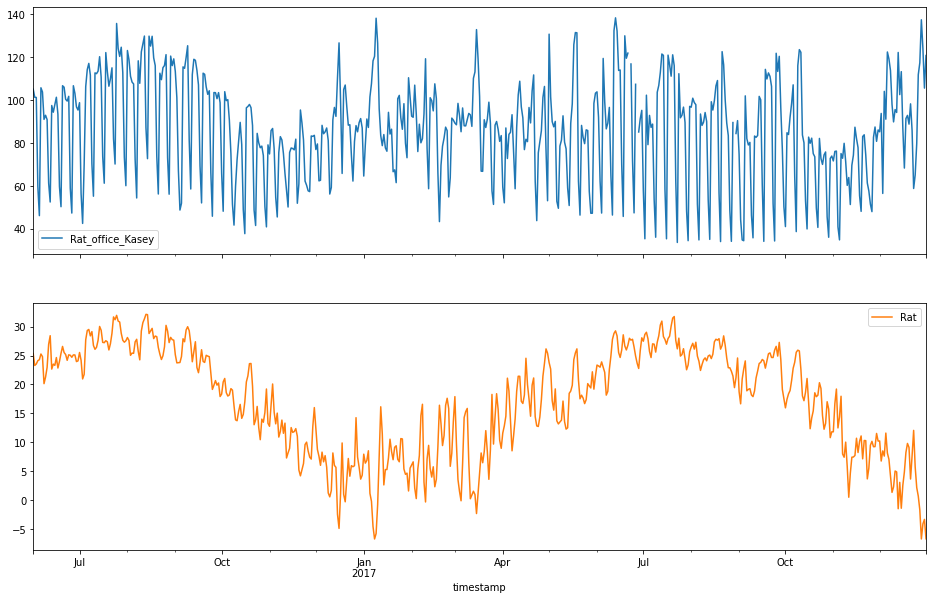

In [119]:
comparison3 = all_data.loc[:, ['Rat_office_Kasey','Rat']]
comparison3.plot(figsize=(16, 10), subplots=True)

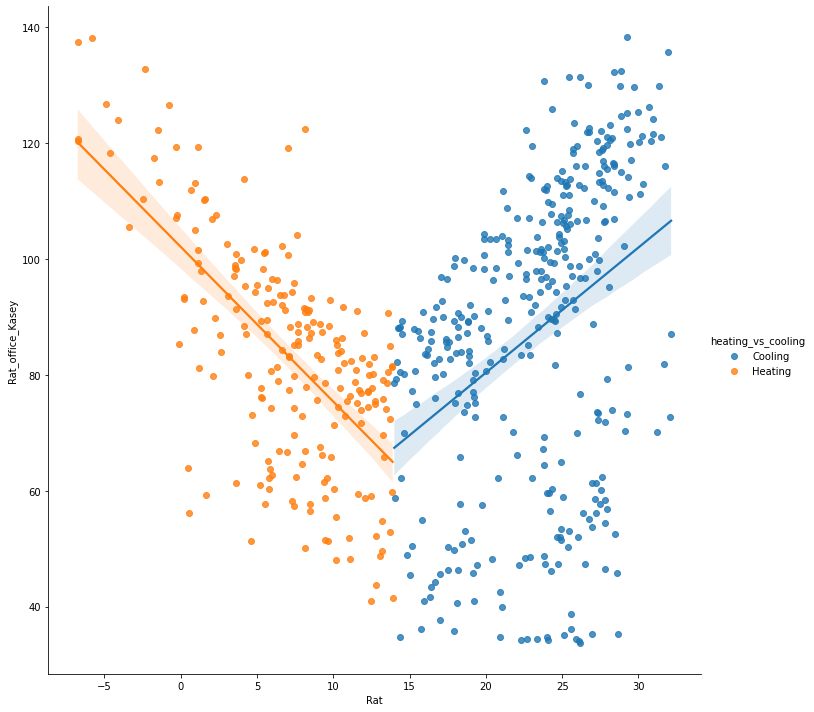

In [120]:
comparison3['heating_vs_cooling'] = comparison3.Rat.apply(lambda x: heat_cooling(x))
sns.lmplot(data=comparison3, x='Rat', y='Rat_office_Kasey', hue='heating_vs_cooling', height=10)